## 1Ô∏è‚É£ Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2Ô∏è‚É£ Chargement du dataset

In [7]:
df_sto = pd.read_csv('../data/df_mm_stores_details.csv')


In [5]:
# Cr√©ation d'une copie du DataFrame 
df_sto_copy = df_sto.copy()  # pour garder une version originale intacte
df_sto_copy.head()

Quarter                            StoreId       State Position  \
0         NaN     Los Angeles - Sunset Boulevard  California     West   
1  2023-04-01     Los Angeles - Sunset Boulevard  California     West   
2  2023-07-01     Los Angeles - Sunset Boulevard  California     West   
3  2023-10-01     Los Angeles - Sunset Boulevard  California     West   
4  2023-01-01  Los Angeles - Hollywood Boulevard  California     West   

         Market ProdId   Product    Type ReportId  
0  Large Market   1_Co  Amaretto  Coffee  JB578CJ  
1  Large Market    NaN  Amaretto  Coffee  UZ650HV  
2  Large Market   1_Co  Amaretto  Coffee  VB278N7  
3  Large Market   1_Co  Amaretto  Coffee  TL8282Y  
4  Large Market   1_Co  Amaretto  Coffee  FB512II

In [8]:
# Aper√ßu rapide
print("Dimensions :", df_sto.shape)
df_sto.head()

Dimensions : (33856, 9)


Quarter                            StoreId       State Position  \
0         NaN     Los Angeles - Sunset Boulevard  California     West   
1  2023-04-01     Los Angeles - Sunset Boulevard  California     West   
2  2023-07-01     Los Angeles - Sunset Boulevard  California     West   
3  2023-10-01     Los Angeles - Sunset Boulevard  California     West   
4  2023-01-01  Los Angeles - Hollywood Boulevard  California     West   

         Market ProdId   Product    Type ReportId  
0  Large Market   1_Co  Amaretto  Coffee  JB578CJ  
1  Large Market    NaN  Amaretto  Coffee  UZ650HV  
2  Large Market   1_Co  Amaretto  Coffee  VB278N7  
3  Large Market   1_Co  Amaretto  Coffee  TL8282Y  
4  Large Market   1_Co  Amaretto  Coffee  FB512II

In [9]:
# Statistiques descriptives
df_sto.info()
df_sto.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33856 entries, 0 to 33855
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Quarter   32680 non-null  object
 1   StoreId   32343 non-null  object
 2   State     33189 non-null  object
 3   Position  32713 non-null  object
 4   Market    31789 non-null  object
 5   ProdId    32104 non-null  object
 6   Product   30761 non-null  object
 7   Type      31021 non-null  object
 8   ReportId  33856 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB


Quarter                            StoreId  State Position  \
count        32680                              32343  33189    32713   
unique           4                                795     20        4   
top     2023-04-01  Wilsonville - SW Wilsonville Road   Utah     West   
freq          8173                                 52   2247    12278   

               Market ProdId      Product    Type ReportId  
count           31789  32104        30761   31021    33856  
unique              3     13           13       2    33855  
top     Medium Market  10_Te  Caffe Mocha  Coffee  LL99883  
freq            15109   2630         2521   16416        2

In [10]:
# aper√ßu global
df_sto.sample(5)

Quarter                                StoreId     State Position  \
9394   2023-07-01             Reynoldsburg - Main Street      Ohio     East   
12520  2023-01-01                   Plano - Legacy Drive     Texas    South   
33036  2023-01-01                 Canton - Market Avenue      Ohio     East   
31033  2023-04-01                 Riverton - 13400 South      Utah     West   
31674  2023-07-01  Brighton - Historic Downtown Brighton  Colorado     West   

              Market ProdId           Product    Type ReportId  
9394   Medium Market   5_Te         Chamomile     Tea  DY475CF  
12520   Large Market   3_Co         Columbian  Coffee  SS090XQ  
33036  Medium Market  12_Co  Regular Espresso  Coffee  TT318I7  
31033   Small Market   2_Te              Mint     Tea  OP4189D  
31674  Medium Market  12_Co  Regular Espresso  Coffee  XG401M7

## 3Ô∏è‚É£ Analyse structurelle

In [11]:
# Structure & types
print("== Info ==")
df_sto.info()
print("\n== Dtypes ==")
print(df_sto.dtypes)


== Info ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33856 entries, 0 to 33855
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Quarter   32680 non-null  object
 1   StoreId   32343 non-null  object
 2   State     33189 non-null  object
 3   Position  32713 non-null  object
 4   Market    31789 non-null  object
 5   ProdId    32104 non-null  object
 6   Product   30761 non-null  object
 7   Type      31021 non-null  object
 8   ReportId  33856 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB

== Dtypes ==
Quarter     object
StoreId     object
State       object
Position    object
Market      object
ProdId      object
Product     object
Type        object
ReportId    object
dtype: object


In [12]:
#  Valeurs manquantes (nombre & %)
missing_tbl = pd.DataFrame({
    "missing_count": df_sto.isna().sum(),
    "missing_pct": (df_sto.isna().mean()*100).round(2)
}).sort_values("missing_pct", ascending=False)
print("\n== Valeurs manquantes (Top) ==")
display(missing_tbl.head(10))


== Valeurs manquantes (Top) ==


missing_count  missing_pct
Product            3095         9.14
Type               2835         8.37
Market             2067         6.11
ProdId             1752         5.17
StoreId            1513         4.47
Quarter            1176         3.47
Position           1143         3.38
State               667         1.97
ReportId              0         0.00

In [13]:
#Doublons (lignes enti√®res)
print("Doublons (toutes colonnes) :", df_sto.duplicated().sum())

Doublons (toutes colonnes) : 0


In [14]:
#  Cl√© de jointure (on teste les candidates usuelles)
candidates = [c for c in ["ReportId","reportid","StoreId","storeid","id"] if c in df_sto.columns]
print("Candidats cl√© :", candidates)

Candidats cl√© : ['ReportId', 'StoreId']


In [ ]:
# Cl√© de jointure 
candidates = [c for c in ["ReportId","reportid","StoreId","storeid","id"] if c in df_sto.columns]
print("Candidats cl√© :", candidates)

key = None
for c in ["reportid","ReportId","storeid","StoreId","id"]:
    if c in df_sto.columns:
        key = c
        break

print("Cl√© retenue :", key)
if key:
    print("NA sur cl√© :", df_sto[key].isna().sum())
    print("Doublons sur cl√© :", df_sto[key].duplicated().sum())

Candidats cl√© : ['ReportId', 'StoreId']
Cl√© retenue : ReportId
NA sur cl√© : 0
Doublons sur cl√© : 1


In [16]:
# Aper√ßu stats num√©riques
print("\n== describe() num√©rique ==")
display(df_sto.describe().T)


== describe() num√©rique ==


count unique                                top   freq
Quarter   32680      4                         2023-04-01   8173
StoreId   32343    795  Wilsonville - SW Wilsonville Road     52
State     33189     20                               Utah   2247
Position  32713      4                               West  12278
Market    31789      3                      Medium Market  15109
ProdId    32104     13                              10_Te   2630
Product   30761     13                        Caffe Mocha   2521
Type      31021      2                             Coffee  16416
ReportId  33856  33855                            LL99883      2

## 4Ô∏è‚É£ Nettoyage des colonnes


In [18]:
# Fonction de nettoyage des noms de colonnes
def to_sup(c):
    return (
        c.strip()
         .replace(" ", "_")
         .replace("-", "_")
         .replace("/", "_")
         .replace("%", "pct")
         .lower()
    )

old_cols = df_sto.columns.tolist()
df_sto.columns = [to_sup(c) for c in df_sto.columns]

print("‚úî Colonnes renomm√©es :")
for o, n in zip(old_cols, df_sto.columns):
    if o != n:
        print(f"{o}  ‚Üí  {n}")


‚úî Colonnes renomm√©es :
Quarter  ‚Üí  quarter
StoreId  ‚Üí  storeid
State  ‚Üí  state
Position  ‚Üí  position
Market  ‚Üí  market
ProdId  ‚Üí  prodid
Product  ‚Üí  product
Type  ‚Üí  type
ReportId  ‚Üí  reportid


In [19]:
# Suppression du doublon cl√©
before = df_sto.shape[0]
df_sto = df_sto.drop_duplicates(subset="reportid", keep="first")
after = df_sto.shape[0]

print(f"Lignes supprim√©es : {before - after}")

Lignes supprim√©es : 1


In [20]:
df_sto.isna().sum().sort_values(ascending=False)
# V√©rifier s‚Äôil reste des doublons de noms de colonnes

product     3095
type        2834
market      2067
prodid      1752
storeid     1513
quarter     1176
position    1143
state        667
reportid       0
dtype: int64

In [21]:
# Cr√©ation d'une copie finale du dataset nettoy√©
df_sto_clean = df_sto.copy()

print("‚úÖ Copie propre cr√©√©e : df_sto_clean")
print("Dimensions :", df_sto_clean.shape)



‚úÖ Copie propre cr√©√©e : df_sto_clean
Dimensions : (33855, 9)


## 5Ô∏è‚É£ Analyse univari√©e

In [22]:

# Statistiques descriptives globales
stats = df_sto_clean.describe(include='all').T
display(stats)


count unique                                top   freq
quarter   32679      4                         2023-04-01   8173
storeid   32342    795  Wilsonville - SW Wilsonville Road     52
state     33188     20                               Utah   2247
position  32712      4                               West  12278
market    31788      3                      Medium Market  15109
prodid    32103     13                              10_Te   2630
product   30760     13                        Caffe Mocha   2521
type      31021      2                             Coffee  16416
reportid  33855  33855                            JB578CJ      1

In [23]:
# Distribution des variables principales
cols_to_plot = ["state", "market", "type", "product", "position"]

for c in cols_to_plot:
    print(f"\n=== {c.upper()} ===")
    display(df_sto_clean[c].value_counts().head(10))



=== STATE ===


state
Utah          2247
California    2241
Nevada        2125
Oregon        2061
Colorado      2012
Washington    1779
Missouri      1710
Iowa          1685
Wisconsin     1677
Ohio          1671
Name: count, dtype: int64


=== MARKET ===


market
Medium Market    15109
Small Market     11771
Large Market      4908
Name: count, dtype: int64


=== TYPE ===


type
Coffee    16416
Tea       14605
Name: count, dtype: int64


=== PRODUCT ===


product
Caffe Mocha          2521
Lemon                2509
Darjeeling           2480
Chamomile            2453
Earl Grey            2435
Columbian            2415
Green Tea            2366
Decaf Irish Cream    2360
Decaf Espresso       2353
Mint                 2271
Name: count, dtype: int64


=== POSITION ===


position
West       12278
East        6978
South       6849
Central     6607
Name: count, dtype: int64

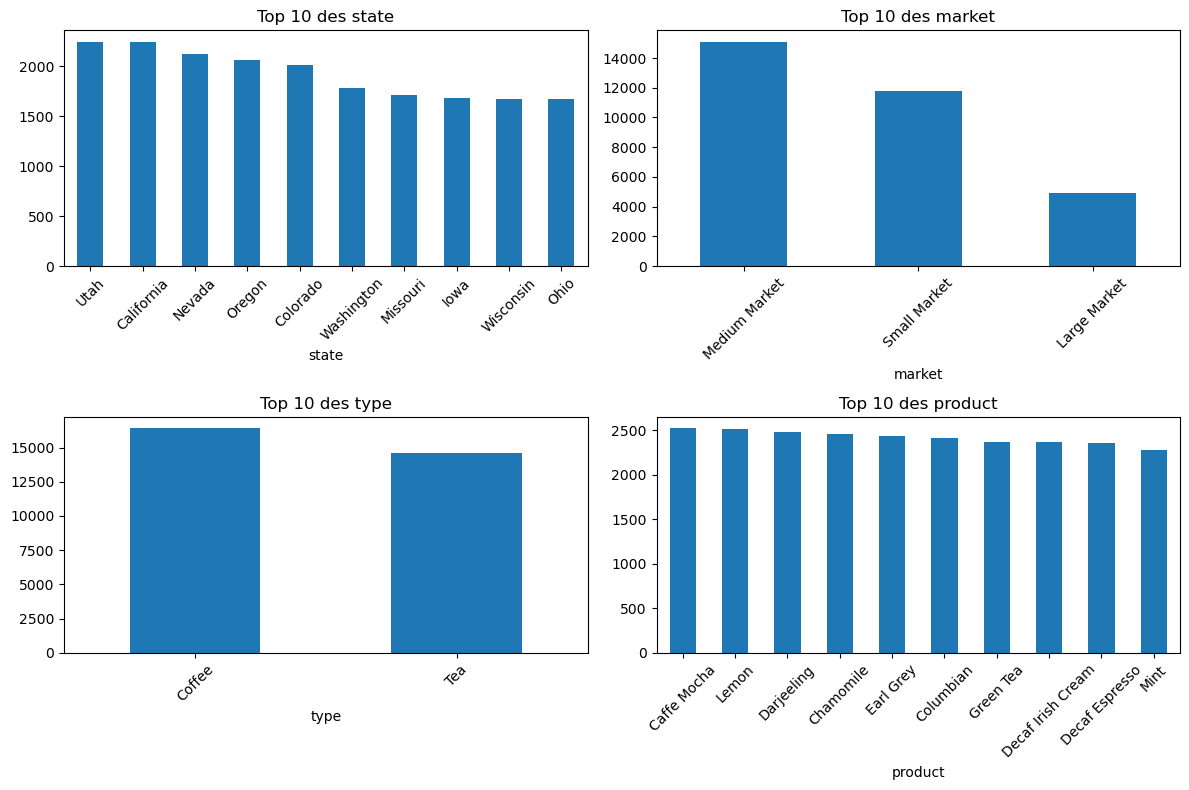

In [24]:
# Histogrammes des variables cat√©gorielles principales
plt.figure(figsize=(12, 8))
for i, c in enumerate(cols_to_plot[:4], 1):
    plt.subplot(2, 2, i)
    df_sto_clean[c].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 des {c}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


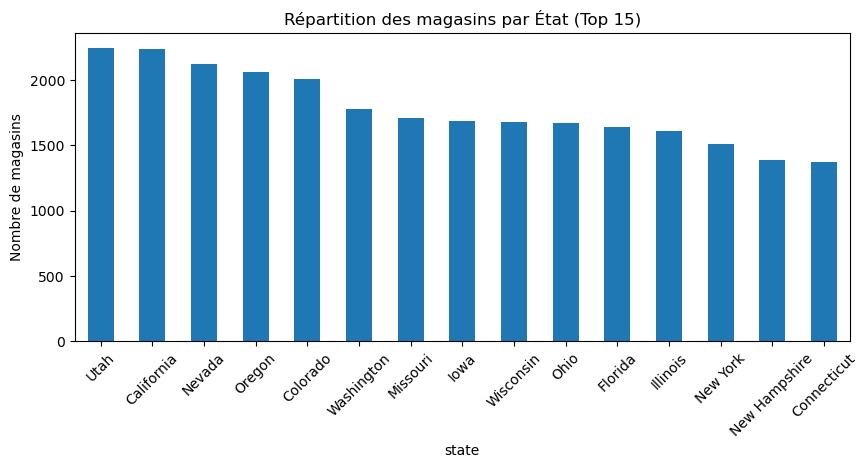

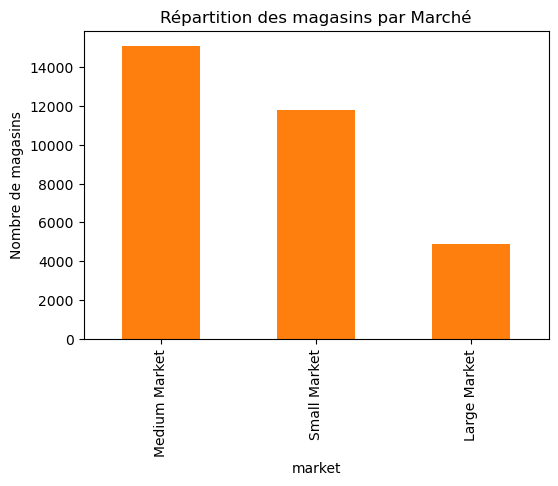

In [25]:
# √âtats les plus repr√©sent√©s
plt.figure(figsize=(10, 4))
df_sto_clean['state'].value_counts().head(15).plot(kind='bar', color="#1f77b4")
plt.title("R√©partition des magasins par √âtat (Top 15)")
plt.ylabel("Nombre de magasins")
plt.xticks(rotation=45)
plt.show()

# March√© (Market)
plt.figure(figsize=(6, 4))
df_sto_clean['market'].value_counts().plot(kind='bar', color="#ff7f0e")
plt.title("R√©partition des magasins par March√©")
plt.ylabel("Nombre de magasins")
plt.show()


In [26]:
# Croisement Type / Market pour d√©tecter des anomalies
cross_tab = pd.crosstab(df_sto_clean["type"], df_sto_clean["market"])
print("=== R√©partition Type / Market ===")
display(cross_tab)


=== R√©partition Type / Market ===


market  Large Market  Medium Market  Small Market
type                                             
Coffee          2416           7243          5717
Tea             2061           6620          5060

### √âtape 5 ‚Äî Analyse univari√©e (R√©sum√©)

- Les colonnes cl√©s (state, market, type, product) sont toutes cat√©gorielles.  
- La majorit√© des magasins appartiennent √† **[√† compl√©ter selon ton graphe]**.  
- Les produits les plus fr√©quents sont **[Coffee, Tea, etc.]**.  
- Certains √âtats ou march√©s sont sous-repr√©sent√©s ‚Üí √† noter pour les jointures ou KPI globaux.  
- Pas d‚Äôanomalie majeure dans les types de magasins.


## 6Ô∏è‚É£ Corr√©lations

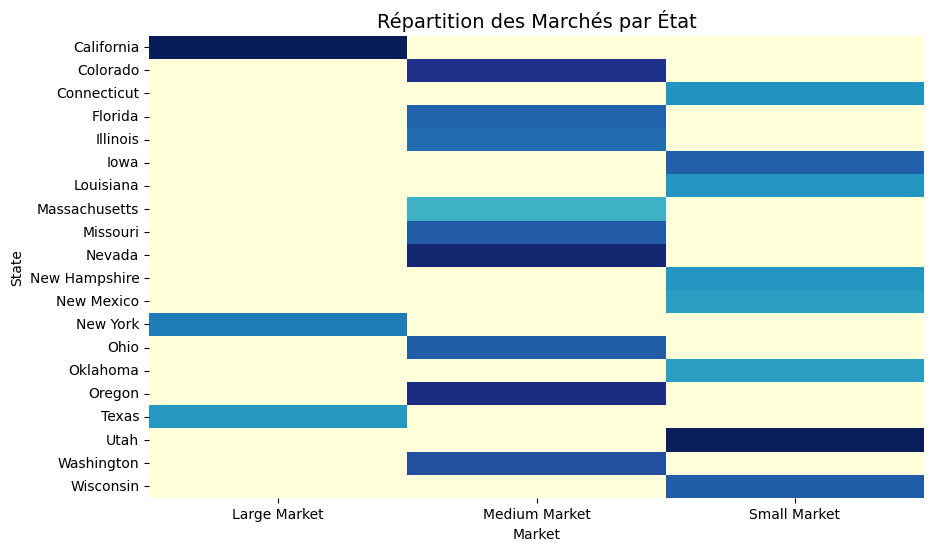

market         Large Market  Medium Market  Small Market
state                                                   
California             2112              0             0
Colorado                  0           1882             0
Connecticut               0              0          1294
Florida                   0           1555             0
Illinois                  0           1502             0
Iowa                      0              0          1573
Louisiana                 0              0          1280
Massachusetts             0           1084             0
Missouri                  0           1596             0
Nevada                    0           2004             0

In [27]:
# R√©partition des march√©s par √âtat
cross_state_market = pd.crosstab(df_sto_clean["state"], df_sto_clean["market"])
plt.figure(figsize=(10,6))
sns.heatmap(cross_state_market, cmap="YlGnBu", cbar=False)
plt.title("R√©partition des March√©s par √âtat", fontsize=14)
plt.xlabel("Market")
plt.ylabel("State")
plt.show()

display(cross_state_market.head(10))


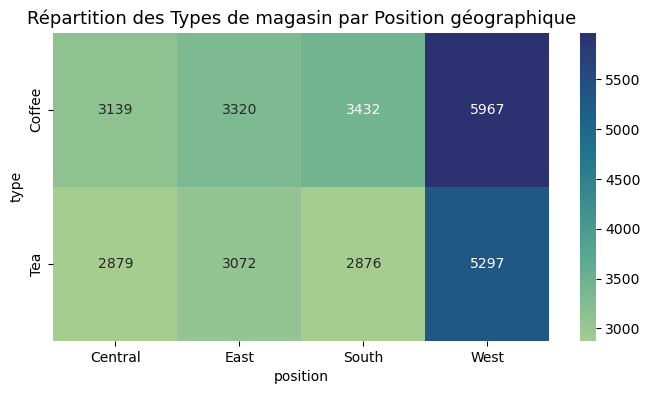

position  Central  East  South  West
type                                
Coffee       3139  3320   3432  5967
Tea          2879  3072   2876  5297

In [28]:
# R√©partition des types de magasin par position g√©ographique
cross_type_pos = pd.crosstab(df_sto_clean["type"], df_sto_clean["position"])
plt.figure(figsize=(8,4))
sns.heatmap(cross_type_pos, annot=True, fmt="d", cmap="crest")
plt.title("R√©partition des Types de magasin par Position g√©ographique", fontsize=13)
plt.show()

display(cross_type_pos)


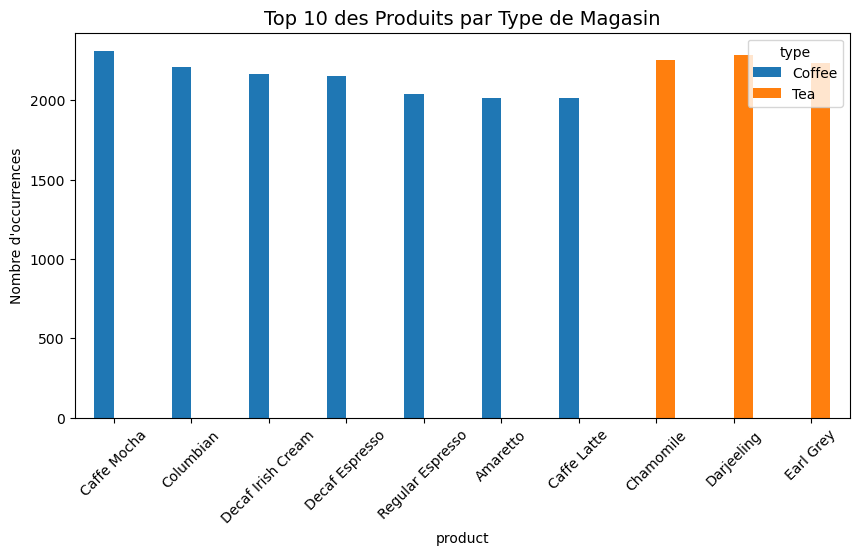

type               Coffee   Tea
product                        
Amaretto             2011     0
Caffe Latte          2011     0
Caffe Mocha          2309     0
Chamomile               0  2252
Columbian            2207     0
Darjeeling              0  2283
Decaf Espresso       2154     0
Decaf Irish Cream    2163     0
Earl Grey               0  2231
Green Tea               0  2156

In [29]:
# Produits les plus vendus selon le type de magasin
cross_prod_type = pd.crosstab(df_sto_clean["product"], df_sto_clean["type"])
cross_prod_type.sort_values(by="Coffee", ascending=False).head(10).plot(
    kind="bar", figsize=(10,5), color=["#1f77b4","#ff7f0e"]
)
plt.title("Top 10 des Produits par Type de Magasin", fontsize=14)
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.show()

display(cross_prod_type.head(10))


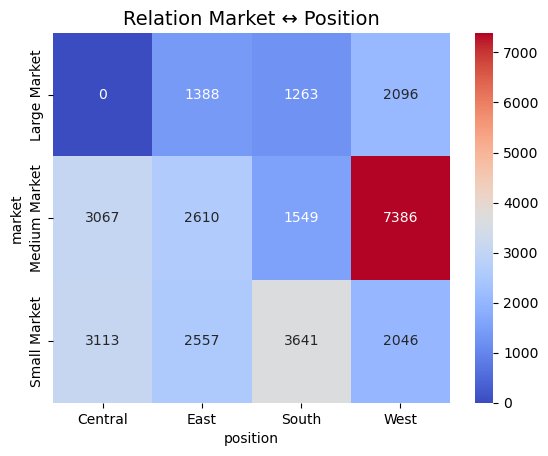

position       Central  East  South  West
market                                   
Large Market         0  1388   1263  2096
Medium Market     3067  2610   1549  7386
Small Market      3113  2557   3641  2046

In [30]:
# Relation entre taille du march√© et position g√©ographique
cross_market_pos = pd.crosstab(df_sto_clean["market"], df_sto_clean["position"])
sns.heatmap(cross_market_pos, annot=True, fmt="d", cmap="coolwarm")
plt.title("Relation Market ‚Üî Position", fontsize=14)
plt.show()

display(cross_market_pos)


### √âtape 6 ‚Äî Analyse bivari√©e : Corr√©lations cat√©gorielles

- Les √âtats de l‚ÄôOuest concentrent la majorit√© des **Medium Markets**.  
- Les **Coffee stores** sont l√©g√®rement plus repr√©sent√©s dans les positions **West** et **Central**,  
  tandis que les **Tea stores** sont un peu plus √©quilibr√©s entre les r√©gions.  
- Certains produits (ex. *Caffe Mocha*, *Darjeeling*, *Earl Grey*) dominent clairement par type.  
- Les grands march√©s (**Large Market**) sont davantage concentr√©s √† l‚ÄôOuest et au Sud.  

**Conclusion :**
‚Üí Les dimensions *g√©ographiques* et *march√©* influencent directement la r√©partition des magasins et produits.  
Ces relations seront utiles pour relier les KPI de performance (ventes, marges, etc.) dans Power BI.


In [31]:
# üíæ Export du fichier store nettoy√©
import os

os.makedirs("../data", exist_ok=True)

output_path_sto = "../data/df_mm_stores_clean.csv"
df_sto_clean.to_csv(output_path_sto, index=False, encoding="utf-8-sig")

print(f"‚úÖ Fichier export√© : {output_path_sto}")
print(f"Taille : {df_sto_clean.shape}")



‚úÖ Fichier export√© : ../data/df_mm_stores_clean.csv
Taille : (33855, 9)
